(20, 21)


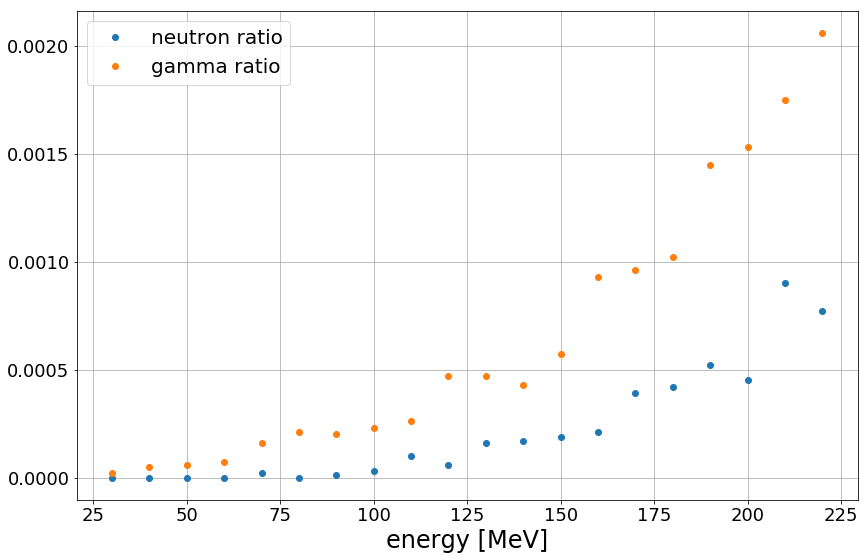

In [3]:

# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import math
import string
import glob

#librerie pyROOT per disegnare grafici
import ROOT
from ROOT import gROOT
from ROOT import TCanvas, TGraph, gPad, TF1, TF2 , kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TMath, TFormula, TGraphErrors, TTree, TDatime, TMath
from ROOT import TCanvas, TGraph, gPad, TF1, kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TMultiGraph, TH1F, TFile
from array import array

rootfile_list = glob.glob('*.root')
energy_list = list(range (30,230,10))

neutron = []; gamma = []; n_ratio = []; g_ratio = []
nevent = 100000

print(len(energy_list), len(rootfile_list))

for energy in energy_list:
    rootfile = 'hrpc_'+str(energy)+'.root'
    input_root = TFile(rootfile)
 
    ntree = input_root.neutron_gap_TOT
    nbranch = ntree.GetBranch('PARTICLE_INCIDENT')
    neutron.append(float(nbranch.GetEntries())/nevent)
    
    gtree = input_root.gamma_gap_TOT
    gbranch = gtree.GetBranch('PARTICLE_INCIDENT')
    gamma.append(float(gbranch.GetEntries())/nevent)
    

    #histo2 = input_root.projectile_range
    #mean = histo2.GetMean()

#print(neutron)
#print(gamma)

#plot data
plt.figure(figsize=(14,9))

#calc ratios / nevents
errorbar(energy_list, neutron,fmt='o', label='neutron ratio')
errorbar(energy_list, gamma,fmt='o', label='gamma ratio')

# Plot set
#semilogy()
plt.grid()
plt.xlabel('energy [MeV]', fontsize=24)
plt.ylabel('', fontsize=24)

tick_params(axis="x", labelsize=18)
tick_params(axis="y", labelsize=18)

#plt.xlim(10, 100)
#plt.ylim(0, 14)

plt.legend(loc='upper left', fontsize=20)
savefig('auto_ratio.jpg')

show()    
 

    
    